In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Airline_booking_data.csv')
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [57]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking


In [58]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [59]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [61]:
df.drop(columns={'length_of_stay'}, inplace= True)

In [62]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<Axes: >

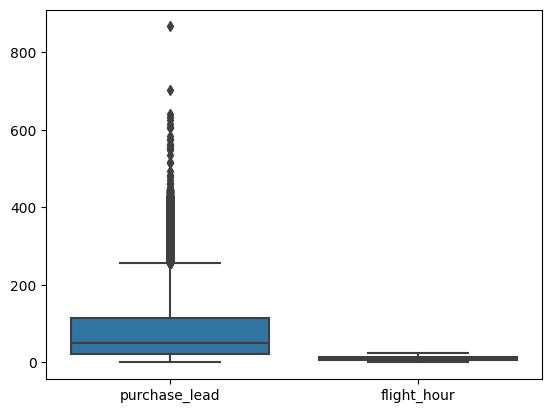

In [64]:
sns.boxplot(df[['purchase_lead', 'flight_hour']])

In [65]:
lower_limit = df['purchase_lead'].mean() - 3*df['purchase_lead'].std()
upper_limit = df['purchase_lead'].mean() + 3*df['purchase_lead'].std()
lower_limit, upper_limit

(-186.41365440309244, 356.2946144030924)

In [66]:
df.drop(df[df['purchase_lead'] > 356].index, inplace=True)

In [68]:
df.shape

(49033, 13)

In [70]:
df.describe()

,num_passengers,purchase_lead,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49033.000000,49033.000000,49033.000000,49033.000000,49033.000000,49033.000000,49033.000000,49033.000000
mean,1.581078,78.777945,9.058083,0.671017,0.298044,0.429405,7.277321,0.149797
std,1.013109,79.690282,5.399954,0.469848,0.457404,0.494996,1.499527,0.356876
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,50.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,109.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,356.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Exploratory Data Analysis

# Number of Passenger Travelling Together

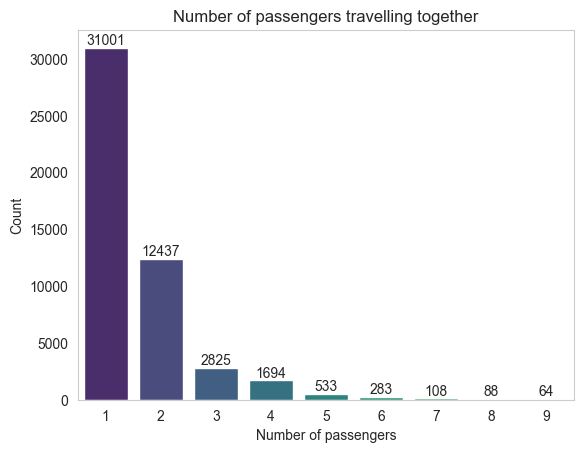

In [351]:
passengers = sns.countplot(x='num_passengers', data=df, palette='viridis')
for bars in passengers.containers:
    passengers.bar_label(bars)
plt.title('Number of passengers travelling together')
plt.xlabel('Number of passengers')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Passenger Travelling By Day

In [74]:
day = df.groupby('flight_day')['num_passengers'].count().sort_values(ascending=False)
day

flight_day
Mon    7864
Wed    7589
Tue    7527
Thu    7353
Fri    6701
Sun    6290
Sat    5709
Name: num_passengers, dtype: int64

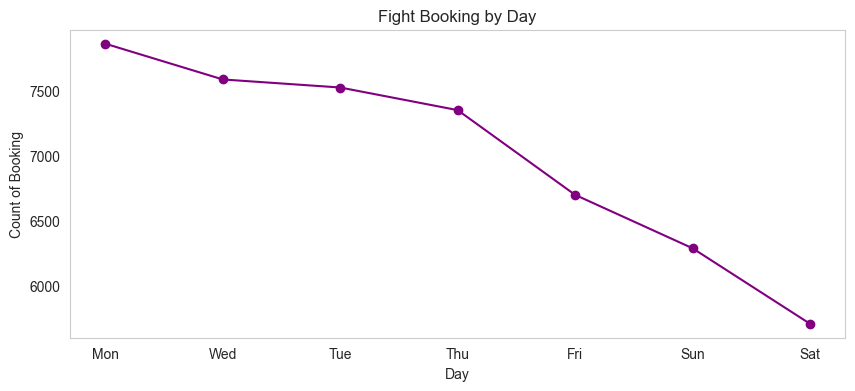

In [99]:
plt.figure(figsize=(10,4))
plt.plot(day.index, day.values, marker='o', color='purple')
plt.title('Fight Booking by Day')  
plt.xlabel('Day')
plt.ylabel('Count of Booking')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Sales Channel for Booking

In [342]:
total_count = df['num_passengers'].count()
total_count 

49033

In [341]:
sales_channel = df.groupby('sales_channel')['num_passengers'].count()
sales_channel

sales_channel
Internet    43520
Mobile       5513
Name: num_passengers, dtype: int64

In [347]:
sales_channel_per = (sales_channel / total_count) * 100
sales_channel_per

sales_channel
Internet    88.756552
Mobile      11.243448
Name: num_passengers, dtype: float64

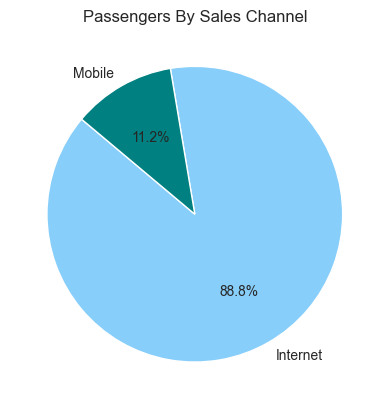

In [101]:
plt.pie(sales_channel.values, labels=sales_channel.index, autopct='%1.1f%%', startangle=140, colors = ['lightskyblue','teal'] )
plt.title('Passengers By Sales Channel')
plt.show()

# Trip Type

In [120]:
trip_type = df.groupby('trip_type')['num_passengers'].count()
trip_type

trip_type
CircleTrip      116
OneWay          383
RoundTrip     48534
Name: num_passengers, dtype: int64

In [349]:
trip_per = (trip_type / total_count) * 100
trip_per

trip_type
CircleTrip     0.236575
OneWay         0.781107
RoundTrip     98.982318
Name: num_passengers, dtype: float64

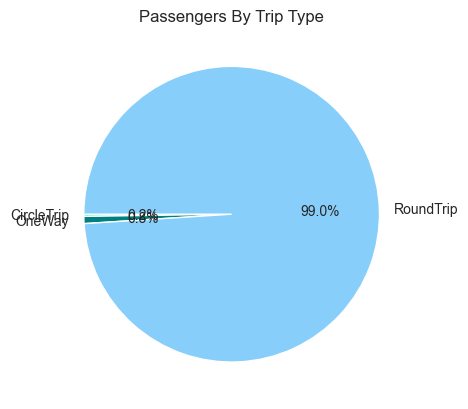

In [125]:
plt.pie(trip_type.values, labels=trip_type.index, autopct='%1.1f%%', startangle=180, colors = ['mediumspringgreen','teal', 'lightskyblue'])
plt.title('Passengers By Trip Type')
plt.show()

# Number of Passengers who want Extra Luggage

In [136]:
df['wants_extra_baggage'] = df['wants_extra_baggage'].replace({0: 'No', 1: 'Yes'}, regex=True) 

In [137]:
extra_baggage= df.groupby('wants_extra_baggage')['num_passengers'].count()
extra_baggage

wants_extra_baggage
No     16131
Yes    32902
Name: num_passengers, dtype: int64

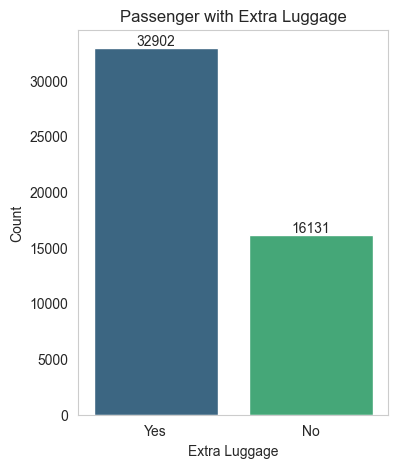

In [254]:
plt.figure(figsize=(4,5)) 
baggage = sns.countplot(x='wants_extra_baggage', data=df, palette='viridis')
for bars in baggage.containers:
    baggage.bar_label(bars)
plt.title('Passenger with Extra Luggage')
plt.xlabel('Extra Luggage')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Number of Passengers who want Preferred Seat

In [139]:
df['wants_preferred_seat'] = df['wants_preferred_seat'].replace({0: 'No', 1: 'Yes'}, regex=True) 

In [140]:
preferred_seat= df.groupby('wants_preferred_seat')['num_passengers'].count()
preferred_seat

wants_preferred_seat
No     34419
Yes    14614
Name: num_passengers, dtype: int64

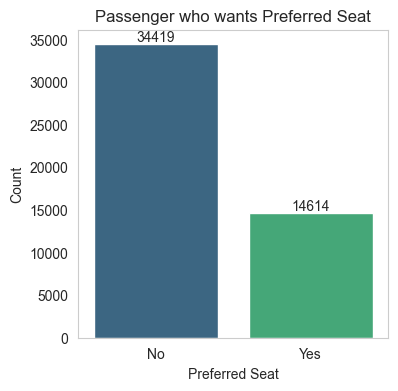

In [255]:
plt.figure(figsize=(4,4)) 
seat = sns.countplot(x='wants_preferred_seat', data=df, palette='viridis')
for bars in seat.containers:
    seat.bar_label(bars)
plt.title('Passenger who wants Preferred Seat')
plt.xlabel('Preferred Seat')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Number of Passengers who want Meal

In [142]:
df['wants_in_flight_meals'] = df['wants_in_flight_meals'].replace({0: 'No', 1: 'Yes'}, regex=True) 

In [143]:
meal= df.groupby('wants_in_flight_meals')['num_passengers'].count()
meal

wants_in_flight_meals
No     27978
Yes    21055
Name: num_passengers, dtype: int64

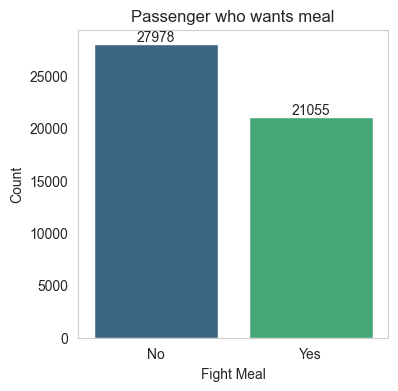

In [256]:
plt.figure(figsize=(4,4)) 
m = sns.countplot(x='wants_in_flight_meals', data=df, palette='viridis')
for bars in m.containers:
    m.bar_label(bars)
plt.title('Passenger who wants meal')
plt.xlabel('Fight Meal')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Number of Passengers By Flight Hours

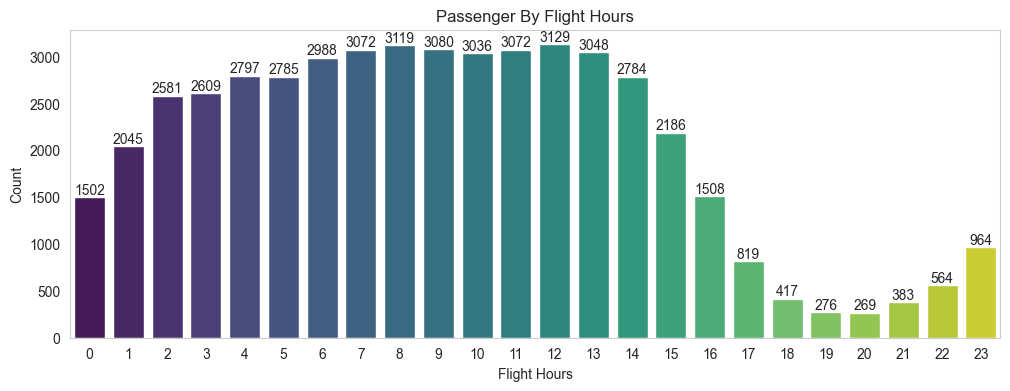

In [259]:
plt.figure(figsize=(12,4)) 
hours = sns.countplot(x='flight_hour', data=df, palette='viridis')
for bars in hours.containers:
    hours.bar_label(bars)  
plt.title('Passenger By Flight Hours')
plt.xlabel('Flight Hours')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Number of Passengers By Booking Status

In [146]:
df['booking_complete'] = df['booking_complete'].replace({0: 'No', 1: 'Yes'}, regex=True) 

In [193]:
booking_complete= df.groupby('booking_complete')['num_passengers'].count()
booking_complete

booking_complete
No     41688
Yes     7345
Name: num_passengers, dtype: int64

In [345]:
booking_per = (booking_complete / total_count) * 100
booking_per

booking_complete
No     85.020292
Yes    14.979708
Name: num_passengers, dtype: float64

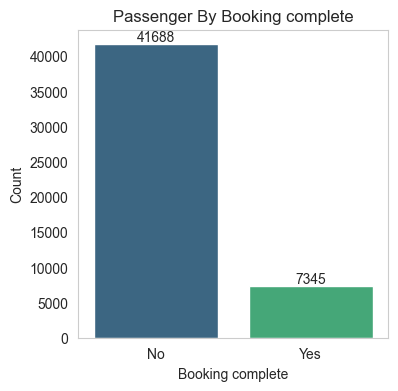

In [257]:
plt.figure(figsize=(4,4)) 
book = sns.countplot(x='booking_complete', data=df, palette='viridis')
for bars in book.containers:
    book.bar_label(bars)
plt.title('Passenger By Booking complete')
plt.xlabel('Booking complete')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Incomplete Bookings
As it is clear out of 49033, 41688 passengers haven't completed there booking, below is analysis to find what could be the possible of such high incomplete booking

# By Purchase Lead

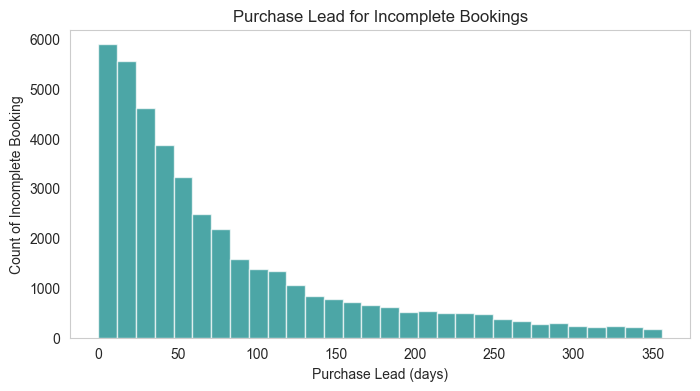

In [265]:
plt.figure(figsize=(8,4))
incomplete_bookings = df[df['booking_complete'] == 'No']
plt.hist(incomplete_bookings['purchase_lead'], bins=30, color='teal', alpha=0.7)
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Count of Incomplete Booking')
plt.title('Purchase Lead for Incomplete Bookings')
plt.grid(False)
plt.show()

# By Country/ Booking Origin

In [244]:
top_10_origins = df['booking_origin'].value_counts().nlargest(10).index

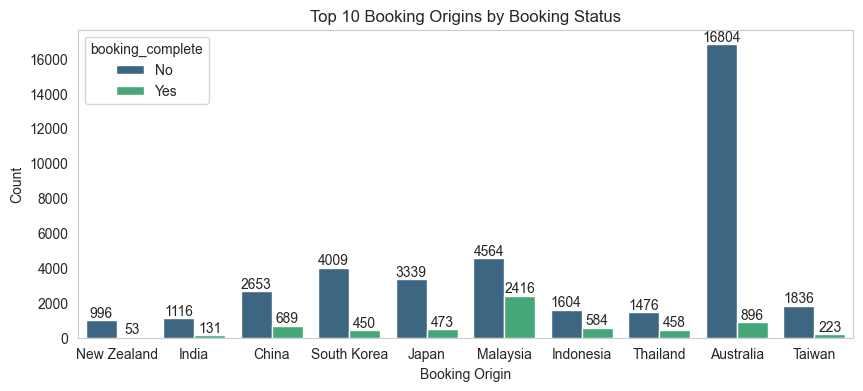

In [268]:
df_top_10 = df[df['booking_origin'].isin(top_10_origins)]

plt.figure(figsize=(10, 4))
ax = sns.countplot(x='booking_origin', hue='booking_complete', data=df_top_10, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Booking Origins by Booking Status')
plt.xlabel('Booking Origin')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 As we see Australia & Malaysia have highest incomplete bookings, so analysis of these two countries is below on different parameters to find the cause of incomplete booking

# By Sales Channel

In [198]:
channel_booking = df.groupby(['sales_channel','booking_complete'])['num_passengers'].count()
channel_booking

sales_channel  booking_complete
Internet       No                  36770
               Yes                  6750
Mobile         No                   4918
               Yes                   595
Name: num_passengers, dtype: int64

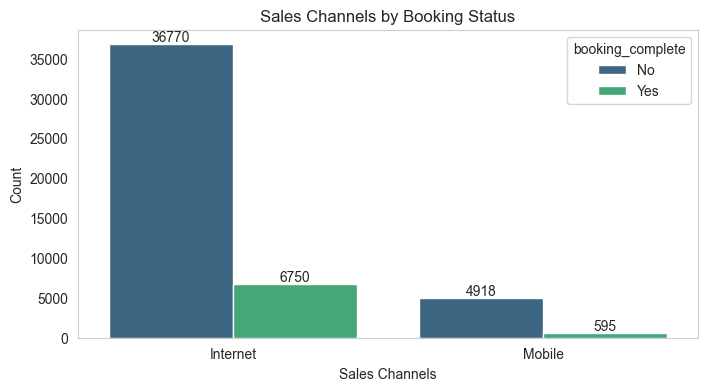

In [263]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='sales_channel', hue='booking_complete', data=df, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)  
plt.title('Sales Channels by Booking Status')
plt.xlabel('Sales Channels')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# By Flight Hours

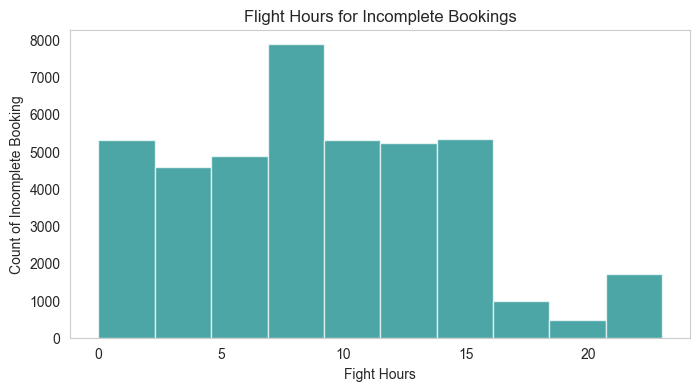

In [264]:
plt.figure(figsize=(8,4))
incomplete_bookings = df[df['booking_complete'] == 'No']
plt.hist(incomplete_bookings['flight_hour'], bins=10, color='teal', alpha=0.7)
plt.xlabel('Fight Hours')
plt.ylabel('Count of Incomplete Booking')
plt.title('Flight Hours for Incomplete Bookings')
plt.grid(False)
plt.show()

# By Route

In [296]:
top_10_routes = df['route'].value_counts().nlargest(10).index

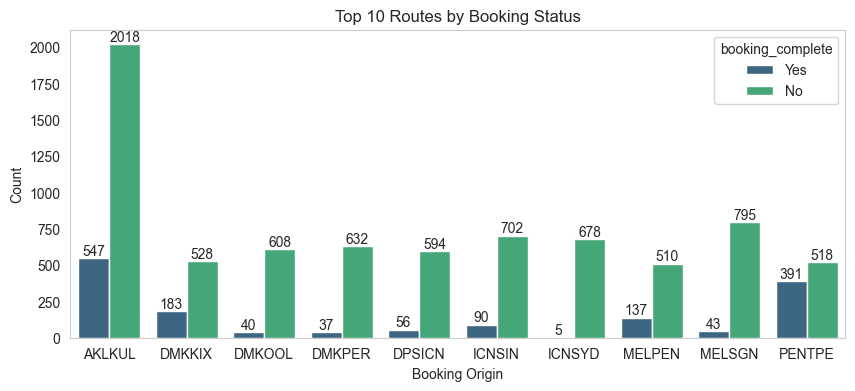

In [300]:
df_top_10_ = df[df['route'].isin(top_10_routes)]

plt.figure(figsize=(10, 4))
ax = sns.countplot(x='route', hue='booking_complete', data=df_top_10_, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Routes by Booking Status')
plt.xlabel('Routes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [352]:
aus = df[(df['booking_complete'] == "No") & (df['booking_origin'] == "Australia") & (df['route'] == "AKLKUL")]
aus

,num_passengers,sales_channel,trip_type,purchase_lead,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1127,1,Internet,RoundTrip,300,2,Fri,AKLKUL,Australia,No,No,No,8.83,No
1623,1,Mobile,RoundTrip,11,12,Fri,AKLKUL,Australia,No,No,No,8.83,No
1791,2,Internet,RoundTrip,43,12,Tue,AKLKUL,Australia,Yes,No,Yes,8.83,No
1821,1,Internet,RoundTrip,55,21,Mon,AKLKUL,Australia,No,Yes,Yes,8.83,No
1996,1,Internet,RoundTrip,198,10,Sun,AKLKUL,Australia,No,No,No,8.83,No
2064,1,Internet,RoundTrip,170,22,Tue,AKLKUL,Australia,Yes,No,No,8.83,No
2088,2,Internet,RoundTrip,321,7,Mon,AKLKUL,Australia,Yes,Yes,Yes,8.83,No
25600,1,Internet,RoundTrip,176,1,Thu,AKLKUL,Australia,No,Yes,No,8.83,No
25612,1,Internet,RoundTrip,7,3,Tue,AKLKUL,Australia,Yes,Yes,No,8.83,No
26474,1,Internet,RoundTrip,59,9,Tue,AKLKUL,Australia,Yes,No,No,8.83,No


In [353]:
mal = df[(df['booking_complete'] == "No") & (df['booking_origin'] == "Malaysia") & (df['route'] == "AKLKUL")]
mal

,num_passengers,sales_channel,trip_type,purchase_lead,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
83,1,Internet,RoundTrip,31,10,Tue,AKLKUL,Malaysia,Yes,No,No,8.83,No
84,1,Internet,RoundTrip,316,16,Tue,AKLKUL,Malaysia,Yes,No,No,8.83,No
85,2,Internet,RoundTrip,232,3,Tue,AKLKUL,Malaysia,Yes,Yes,Yes,8.83,No
92,1,Internet,RoundTrip,6,19,Tue,AKLKUL,Malaysia,No,No,No,8.83,No
93,1,Internet,RoundTrip,227,2,Fri,AKLKUL,Malaysia,Yes,Yes,No,8.83,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42545,2,Mobile,RoundTrip,36,4,Wed,AKLKUL,Malaysia,No,No,No,8.83,No
42546,1,Internet,RoundTrip,77,1,Wed,AKLKUL,Malaysia,No,No,Yes,8.83,No
42547,1,Internet,RoundTrip,72,8,Mon,AKLKUL,Malaysia,No,No,No,8.83,No
42548,1,Internet,RoundTrip,68,9,Tue,AKLKUL,Malaysia,No,No,No,8.83,No


# Incomplete Booking By Australia

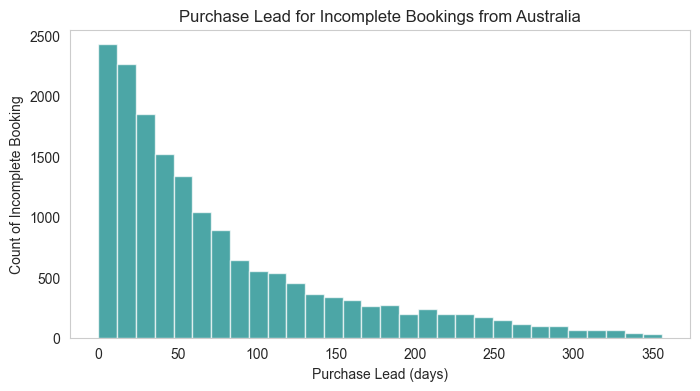

In [289]:
plt.figure(figsize=(8, 4))
plt.hist(df[(df['booking_complete'] == 'No') & (df['booking_origin'] == "Australia")]['purchase_lead'], bins=30, color='teal', alpha=0.7)
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Count of Incomplete Booking')
plt.title('Purchase Lead for Incomplete Bookings from Australia')
plt.grid(False)
plt.show()

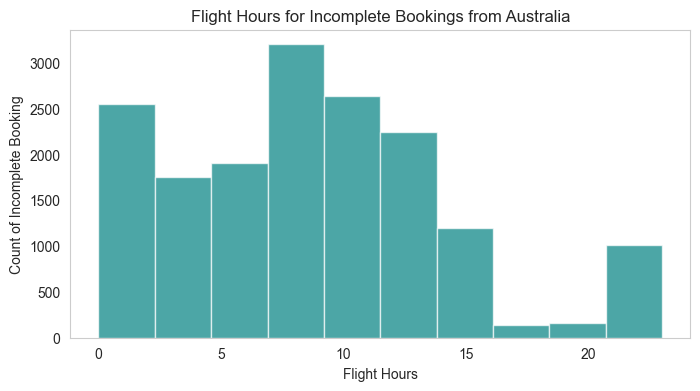

In [312]:
plt.figure(figsize=(8, 4))
plt.hist(df[(df['booking_complete'] == 'No') & (df['booking_origin'] == "Australia")]['flight_hour'], bins=10, color='teal', alpha=0.7)
plt.xlabel('Flight Hours')
plt.ylabel('Count of Incomplete Booking')
plt.title('Flight Hours for Incomplete Bookings from Australia')
plt.grid(False)
plt.show()

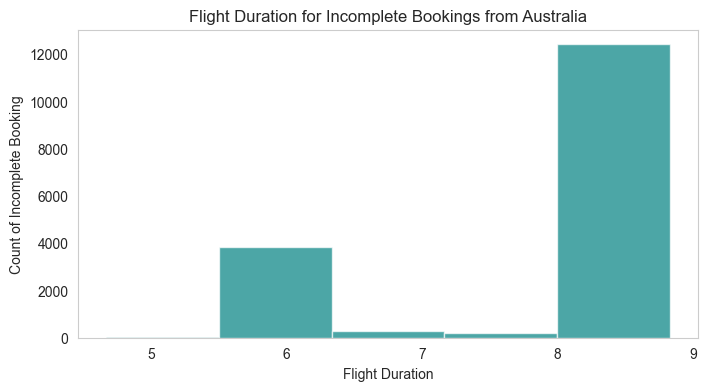

In [354]:
plt.figure(figsize=(8, 4))
plt.hist(df[(df['booking_complete'] == 'No') & (df['booking_origin'] == "Australia")]['flight_duration'], bins=5, color='teal', alpha=0.7)
plt.xlabel('Flight Duration')
plt.ylabel('Count of Incomplete Booking')
plt.title('Flight Duration for Incomplete Bookings from Australia')
plt.grid(False)
plt.show()

# Incomplete Booking By Malaysia

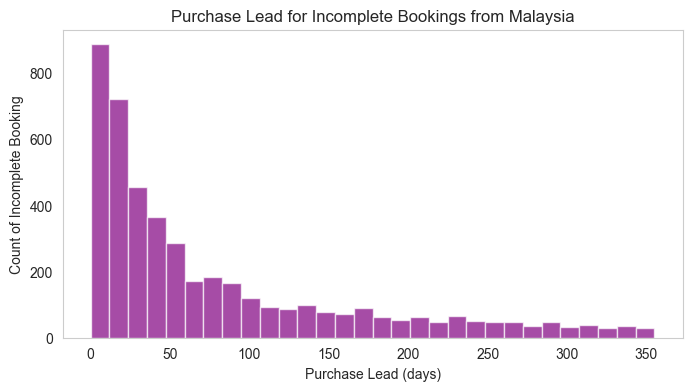

In [355]:
plt.figure(figsize=(8, 4))
plt.hist(df[(df['booking_complete'] == 'No') & (df['booking_origin'] == "Malaysia")]['purchase_lead'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Count of Incomplete Booking')
plt.title('Purchase Lead for Incomplete Bookings from Malaysia')
plt.grid(False)
plt.show()

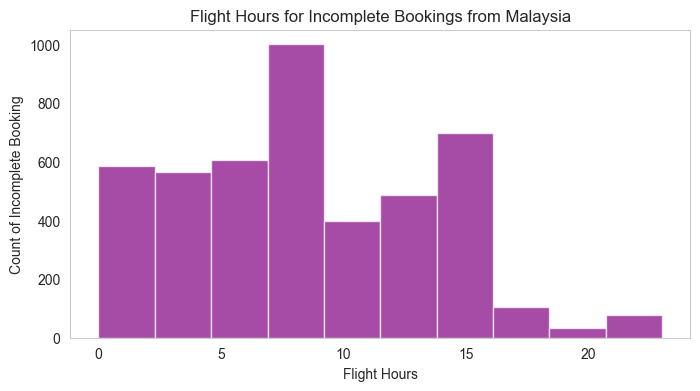

In [318]:
plt.figure(figsize=(8, 4))
plt.hist(df[(df['booking_complete'] == 'No') & (df['booking_origin'] == "Malaysia")]['flight_hour'], bins=10, color='purple', alpha=0.7)
plt.xlabel('Flight Hours')
plt.ylabel('Count of Incomplete Booking')
plt.title('Flight Hours for Incomplete Bookings from Malaysia')
plt.grid(False)
plt.show()

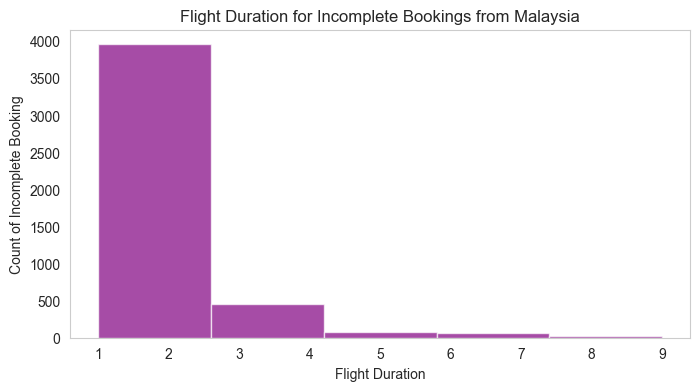

In [316]:
plt.figure(figsize=(8, 4))
plt.hist(df[(df['booking_complete'] == 'No') & (df['booking_origin'] == "Malaysia")]['num_passengers'], bins=5, color='purple', alpha=0.7)
plt.xlabel('Flight Duration')
plt.ylabel('Count of Incomplete Booking')
plt.title('Flight Duration for Incomplete Bookings from Malaysia')
plt.grid(False)
plt.show()

# Insights

* Out of 49033, 31001 are single travellers
* Booking are made on Monday the most & least on Saturday, & booking were mostly made through internet(Cyber Cafes), almosr 89%
* Round Trip were made more
* Passenger prefer to pay for extra luggage & prefer to have desire seat with meal
* Passenger are traveling more to distant location as fight durations are highest between 7 to 13 hours
* 85% didn't complete their booking

--- Incomplete Booking ---

Booking were majorily incomplete by the passengers who made booking 100 days before, specially the one who made immeadiate booking & 2-3 days before

Australia has highest incomplete number of bookings, followed by Malaysia, especially the ones following AKLKUL route may be because this route takes 8.3 hrs

Flights which are between 7 to 10 hr departure time has highest incomplete bookings


For Australia, 
* flights which are 0 & between 7 to 10 hr departure time has highest incomplete bookings
* majorily incomplete by the passengers who made booking 70 days before
* flights which are about 8-9 hrs has highest incomplete bookings


For Malaysia,  
* flights which are between 8 to 10 hr departure time has highest incomplete bookings
* majorily incomplete by the passengers who made booking 50 days before
* flights which are about 1-2 hrs has highest incomplete bookings


